# 3. Logistic Regression
***

- Logistic regression is the most fundamental algorithm for handling binary classification problems
- It's a commonly used algorithm for constructing a baseline model, and is generally a good first model to build, because it's highly interpretable
- Logistic regression is similar to linear regression
    - We're still dealing with the line equation for making predictions, but this time the result is passed through the sigmoid function to turn ouptut into the probability
    - The probability tells you the chance of this instance belonging to the positive classs
        - For example, if you have two classes (bad, good), "good" is the positive class, and output of 0.8 means the model is 80% condifdent the instance belongs to the positive class
- In a nutshell, logistic regression model outputs probabilities instead of raw classes
    - We then get the classes by applying a certain threshold
    - For example, if the probability is greater than 0.5, we assign the positive class, and negtive class in the other case
    - This threshold can (and should) be altered depending on the problem and the type of metric you're optimizing for
    - More on that later
    
**Assumptions** (source: https://www.statisticssolutions.com/assumptions-of-logistic-regression/)
- Logistic regression **DOES NOT** assume:
    - Linear relationship between the dependent and independent variables
    - Normal distribution of the residuals
    - Homoscedasticity - constant variance in the residuals
- Logistic regression **DOES** assume:
    - Independent observations
    - Little or no multicollinearity among independent variables
    - Linearity of indenpendent variables and log odds
    - Large sample size - minimum of 10 cases with the least frequent outcome for each independent variable in your model
        - E.g., if you have 5 independent variables and expected probability of the least frequenct outcome is 0.1, then you need a minimum sample size of 500 (10 * 5 / 0.1)

## Math behind

- In a way, we're still dealing with a line equation
- Formula of a line equation

$$ \large \hat{y} = wx + b $$

- The **Sigmoid/Logistic** function is applied to the result
- The formula for this function is as follows:

$$ \large S(x) = \frac{1}{1 + e^{-x}} $$

- Let's visualize the function to see what happens behind the scenes

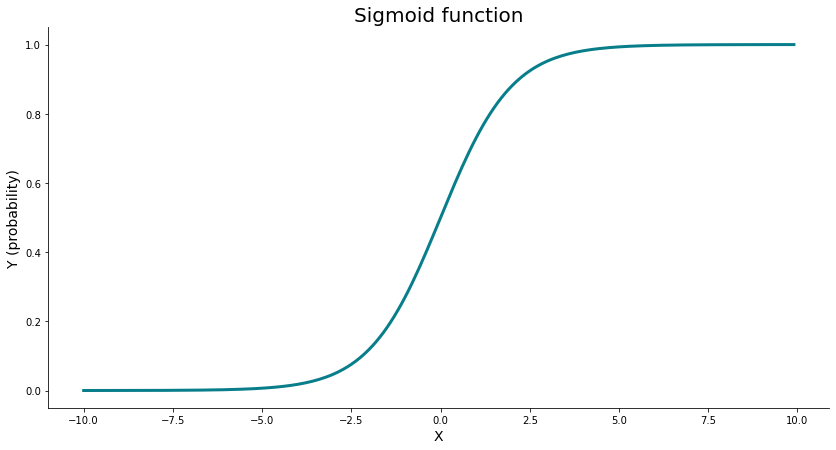

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (14, 7)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

xs = np.arange(-10, 10, 0.1)
ys = [sigmoid(x) for x in xs]

plt.plot(xs, ys, c='#087E8B', lw=3)
plt.title('Sigmoid function', size=20)
plt.xlabel('X', size=14)
plt.ylabel('Y (probability)', size=14)
plt.savefig('images/003_LogisticRegression_sigmoid_function.png', dpi=300, bbox_inches='tight')
plt.show()

- Essentially, sigmoid function returns a value between 0 and 1
- This value is interpreted as a probability of the positive class
- We can make classification from probabilities
    - If the probability is greater than some threshold (commonly 0.5), assign the positive class
    - If the probability is less than some threshold (commonly 0.5), assign the negative class
    
- As with linear regression, there are two parameters we need to optimize for - weights and bias
- To perform the optimization, we'll need to declare **Cost function**
    - We can't use Mean Squared Error as with linear regression
    - We can, in theory, but it's not a good idea, because MSE was designed to evaluate regression models
    - Instead, we can use the **Cross Entropy** function
    
- Formula of the **Binary Cross Entropy** function (2 classes):

$$ \large BCE = - \frac{1}{n} \sum_{i}^{n} y_i \cdot log \hat{y}_i + (1 - y_i) \cdot log (1 - {\hat{y}_i}) $$

- The $ \hat{y} $ in the formula can be re-written as a sigmoid function for a given input
- A brief introduction to BCE is made later
- Next you'll need to use this cost function in gradient descent to iteratively update weights and bias
- To do so, you'll have to calculate partial derivatives of the cross entropy function wrt. weights and bias parameters:

$$ \large \partial_w = \frac{1}{N}\sum 2x_i(\hat{y} - y_i)) $$
<br>
$$ \large \partial_b = \frac{1}{N}\sum 2(\hat{y} - y_i)) $$

- This $ 2 $ can be ommited, or you can leave it - it's not important
- Next, we're updating the existing weights and bias according to the following formulas:

$$ \large w = w - \alpha \cdot \partial_w $$
<br>
$$ \large b = b - \alpha \cdot \partial_b $$

- Where $ \alpha $ is the learning rate
- This process is then repeated for a predefined number of iterations
- Before we see this in action, let's make a brief introduction to the Binary Cross Entropy function

<br>

## A Brief Introduction to Binary Cross Entropy
- Binary cross entropy function is a common cost function for evaluating binary classification machine learning algorithms
- Commonly refered to as *log loss*
- It's value can be calculated from the previously mentioned formula
- This cost function "punishes" wrong predictions much more than it "rewards" good predictions

**Example 1: Calculating BCE for a correct prediction**
- Let's say your model predicts the positive class with 90% probability
- This means the model is only 10% confident the negative class should be predicted
- What's the cross entropy value? 

![](images/003_logreg_crossentropy_small.jpg)

- As you can see, the value of cross entropy (or *loss*) is rather small

**Example 2: Calculating BCE for a incorrect prediction**
- Let's say your model predicts the positive class with 10% probability
- This means the model is 90% confident the negative class should be predicted
- What's the cross entropy value? 

![](images/003_logreg_crossentropy_big.jpg)

- As you can see, the loss here is quite big
- We can calculate both with Python:

In [2]:
def binary_cross_entropy(y, y_hat):
    def safe_log(x): return 0 if x == 0 else np.log(x)
    
    total = 0
    for curr_y, curr_y_hat in zip(y, y_hat):
        total += (curr_y * safe_log(curr_y_hat) + (1 - curr_y) * safe_log(1 - curr_y_hat))
    return - total / len(y)

- We need the `safe_log()` function inside because `log(0)` returns infinity:

In [3]:
np.log(0)

<ipython-input-3-f6e7c0610b57>:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

- Let's evalutate for **Example 1**:

In [4]:
binary_cross_entropy(y=[1, 0], y_hat=[0.9, 0.1])

0.10536051565782628

- And now for **Example 2**:

In [5]:
binary_cross_entropy(y=[1, 0], y_hat=[0.1, 0.9])

2.302585092994046

- You now know everything needed to implement Logistic regression algorithm from scratch

<br><br>

## Implementation
- The `LogisticRegression` class is written to follow the familiar Scikit-Learn syntax
- The coefficients are set to None at the start - `__init__()` method
- The `fit()` method calculates the coefficients
- The `predict()` method essentially implements the line equation passed through a sigmoid function
- The `_binary_cross_entropy()` private function is used to calculate loss at every iteration:

In [6]:
class LogisticRegression:
    '''
    A class which implements logistic regression model with gradient descent.
    '''
    def __init__(self, learning_rate=0.1, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights, self.bias = None, None
        
    @staticmethod
    def _sigmoid(x):
        '''
        Private method, used to pass results of the line equation through the sigmoid function.
        
        :param x: float, prediction made by the line equation
        :return: float
        '''
        return 1 / (1 + np.exp(-x))
    
    @staticmethod
    def _binary_cross_entropy(y, y_hat):
        '''
        Private method, used to calculate binary cross entropy value between actual classes 
        and predicted probabilities.
        
        :param y: array, true class labels
        :param y_hat: array, predicted probabilities
        :return: float
        '''
        def safe_log(x): 
            return 0 if x == 0 else np.log(x)
        total = 0
        for curr_y, curr_y_hat in zip(y, y_hat):
            total += (curr_y * safe_log(curr_y_hat) + (1 - curr_y) * safe_log(1 - curr_y_hat))
        return - total / len(y)
        
    def fit(self, X, y):
        '''
        Used to calculate the coefficient of the logistic regression model.
        
        :param X: array, features
        :param y: array, true values
        :return: None
        '''
        # 1. Initialize coefficients
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # 2. Perform gradient descent
        for i in range(self.n_iterations):
            linear_pred = np.dot(X, self.weights) + self.bias
            probability = self._sigmoid(linear_pred)
            
            # Calculate derivatives
            partial_w = (1 / X.shape[0]) * (2 * np.dot(X.T, (probability - y)))
            partial_d = (1 / X.shape[0]) * (2 * np.sum(probability - y))
            
            # Update the coefficients
            self.weights -= self.learning_rate * partial_w
            self.bias -= self.learning_rate * partial_d
            
    def predict_proba(self, X):
        '''
        Calculates prediction probabilities for a given threshold using the line equation 
        passed through the sigmoid function.
        
        :param X: array, features
        :return: array, prediction probabilities
        '''
        linear_pred = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_pred)
    
    def predict(self, X, threshold=0.5):
        '''
        Makes predictions using the line equation passed through the sigmoid function.
        
        :param X: array, features
        :param threshold: float, classification threshold
        :return: array, predictions
        '''
        probabilities = self.predict_proba(X)
        return [1 if i > threshold else 0 for i in probabilities]

<br>

## Testing
- We'll use the *breast cancer* dataset from Scikit-Learn:

In [7]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target

- The below code cell applies train/test split to the dataset:

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- You can now initialize and train the model, and afterwards make predictions:

In [9]:
model = LogisticRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

<ipython-input-6-822322b64438>:18: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


- These are the "optimal" weights:

In [10]:
model.weights

array([ 6.48458109e+01,  8.46348283e+01,  3.76652184e+02,  1.54054003e+02,
        5.83159961e-01, -2.99918435e-01, -1.18719824e+00, -5.08264671e-01,
        1.09780244e+00,  4.70543004e-01,  2.55378613e-01,  6.20056326e+00,
       -1.54946182e+00, -1.60920898e+02,  3.11666417e-02, -6.77737261e-02,
       -1.32537252e-01, -1.64448048e-02,  9.92337789e-02,  1.02283101e-02,
        6.80812543e+01,  1.05097039e+02,  3.79967070e+02, -2.23235180e+02,
        7.12011129e-01, -1.31516705e+00, -2.55931308e+00, -5.99329656e-01,
        1.40482786e+00,  4.28992752e-01])

- And this is the "optimal" bias:

In [11]:
model.bias

8.486537143743831

- Let's evaluate the model with two metrics - accuracy score and the confusion matrix

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [13]:
accuracy_score(y_test, preds)

0.9473684210526315

In [14]:
print(confusion_matrix(y_test, preds))

[[43  0]
 [ 6 65]]


- The model seems to be performing good
- Has more false negatives than false positives

<br><br>

## Threshold Optimization
- There's no guarantee that 0.5 is the best classification threshold for every classification problem
- We can change the threshold by altering the `threshold` parameter of the `predict()` method:
- Let's optimize the threshold for accuracy - you can choose any metric you want:

In [15]:
evals = []

for thresh in np.arange(0, 1.01, 0.01):
    preds = model.predict(X_test, threshold=thresh)
    acc = accuracy_score(y_test, preds)
    evals.append({'Threshold': thresh, 'Accuracy': acc})

<ipython-input-6-822322b64438>:18: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


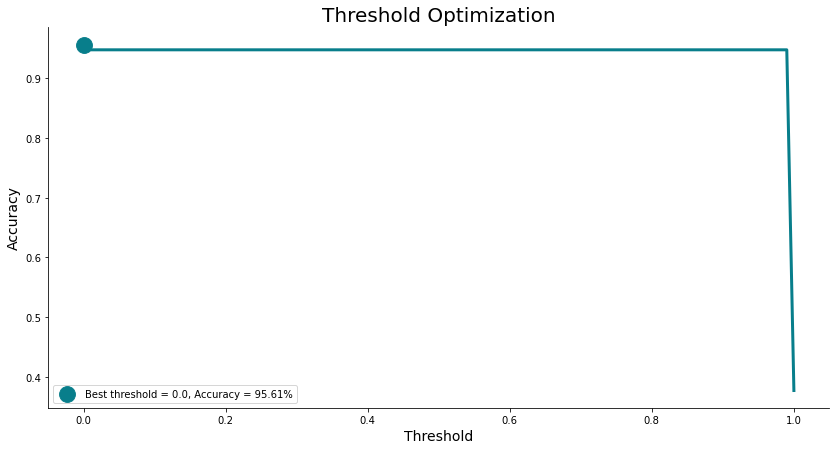

In [16]:
import pandas as pd
evals_df = pd.DataFrame(evals)

best_thresh = evals_df.sort_values(by='Accuracy', ascending=False).iloc[0]

plt.plot(evals_df['Threshold'], evals_df['Accuracy'], lw=3, c='#087E8B')
plt.scatter(best_thresh['Threshold'], best_thresh['Accuracy'], label=f"Best threshold = {best_thresh['Threshold']}, Accuracy = {(best_thresh['Accuracy'] * 100):.2f}%", s=250, c='#087E8B')
plt.title('Threshold Optimization', size=20)
plt.xlabel('Threshold', size=14)
plt.ylabel('Accuracy', size=14)
plt.legend()
plt.savefig('images/003_LogisticRegression_threshold_optimization.png', dpi=300, bbox_inches='tight')
plt.show()

- You can now retrain with the best threshold:

In [17]:
model = LogisticRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test, threshold=0)

<ipython-input-6-822322b64438>:18: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


- Let's evaluate again for accuracy and confusion matrix:

In [18]:
accuracy_score(y_test, preds)

0.956140350877193

In [19]:
print(confusion_matrix(y_test, preds))

[[43  0]
 [ 5 66]]


<br>

## Comparison with Scikit-Learn
- We want to know if our model is good, so let's compare it with `LogisticRegression` model from Scikit-Learn

In [20]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

/Users/dradecic/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
accuracy_score(y_test, lr_preds)

0.956140350877193

In [22]:
print(confusion_matrix(y_test, lr_preds))

[[39  4]
 [ 1 70]]


- They are more or less the same, accuracy-wise